### This notebook converts the reconstructed-level simulation to pickled .npy files for training a regression model.

The generation steps are outlined here: https://github.com/miguelignacio/inputdata
The regression notebook is simply called TowardsCodesign.ipynb located in this repo.

In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak

## Get file and TTree, print branches, convert to array

In [5]:
#input_file = "rec_test_270angle.root"
input_file = 'rec_piplus_10k.root'
output_npy = "Mar3_e1k"
e_events = ur.open("%s:events"%(input_file)) #1k electrons march3
e_events["HcalEndcapPHitsReco.energy"].array(library="pd") #pandas give a nice view of the data

KeyInFileError: not found: 'events' (with any cycle number)

    Available keys: (none!)

in file rec_piplus_10k.root

In [34]:
#def get_vector(events,varname='HcalEndcapHits',energy='energy'):
def get_vector(events,varname='HcalEndcapHitsP',energy='energy'):
    E = events["%s.%s"%(varname,energy)].array(library='np')
    x = events["%s.position.x"%varname].array(library='np')
    y = events["%s.position.y"%varname].array(library='np')
    z = events["%s.position.z"%varname].array(library='np')
    #theta = events["%s.polar.theta"%varname].array(library='np')
    #phi = events["%s.polar.phi"%varname].array(library='np')

    return E,x, y, z, theta, phi

def get_truth(gen_events,varname="MCParticles"):
    pdgID = gen_events["%s.%s"%(varname,'PDG')].array(library='np')
    status = gen_events["%s.%s"%(varname,'simulatorStatus')].array(library='np')
    genStatus = gen_events["%s.%s"%(varname,'generatorStatus')].array(library='np')
    pex = gen_events["%s.%s"%(varname,'momentum.x')].array(library='np')
    pey = gen_events["%s.%s"%(varname,'momentum.y')].array(library='np')
    pez = gen_events["%s.%s"%(varname,'momentum.z')].array(library='np')
    mass = gen_events["%s.%s"%(varname,'mass')].array(library='np')
    
    #genStatus = gen_events['mcparticles.genStatus'].array(library='np')
    #pex = gen_events['MCParticles.psx'].array(library='np')
    #pey = gen_events['MCParticles.psy'].array(library='np')
    #pez = gen_events['MCParticles.psz'].array(library='np')
    #mass = gen_events['MCParticles.mass'].array(library='np')
    return pdgID,status, genStatus,pex,pey,pez,mass

In [35]:
E = {}
x = {}
y = {}
z  = {}
theta={}
phi = {}


## Get data

# get hits

In [36]:

for i in ['HcalEndcapP','EcalEndcapP']:#,'TrackerEndcap','VertexEndcap']:
    tag = 'e_' + i
    E[tag], x[tag], y[tag],z[tag],theta[tag],phi[tag] = get_vector(e_events,varname="%sHitsReco"%i)

## get MC

In [6]:
def get_GeneratedValues(events):
    mc = {} 
    mc['pdgID'], mc['status'], mc['genStatus'], mc['pex'],mc['pey'], mc['pez'], mc['mass']= get_truth(events)
    for i in range(len(mc['pdgID'][0])):
        if(mc['genStatus'][0][i] !=1): continue
        px = mc['pex'][0][i]
        py =  mc['pey'][0][i]
        pz = mc['pez'][0][i]
        pt =  np.sqrt(px*px + py*py)
        p = np.sqrt(px*px+py*py+pz*pz)
        theta = np.arccos(pz/p)*180/np.pi
        print('MC particle ID ', mc['pdgID'][0][i],  'genStatus ', mc['genStatus'][0][i],
               ' px = %2.2f, py=%2.2f, pz=%2.2f'%(mc['pex'][0][i],mc['pey'][0][i],mc['pez'][0][i]))
        print('p = %2.2f , theta =%2.2f'%(p, theta))
    return p, theta

truth = {}
truth['e_p'], truth['e_theta'] = get_GeneratedValues(e_events)

MC particle ID  11 genStatus  1  px = 19.05, py=-6.01, pz=-1.23
p = 20.01 , theta =93.54


## Get clusters

In [7]:
#for i in ['HcalBarrelClusters','HcalHadronEndcapClusters','EcalBarrelClusters','EcalEndcapClusters']:
#    E[i], x[i], y[i],z[i] = get_vector("%s"%i,energy='energy')

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [9]:
print(x.keys())

dict_keys(['e_HcalEndcapP', 'e_EcalEndcapP'])


## Plot 2D transverse view for hits in endcap

/tmp/ipykernel_10160/661090409.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ECAL_x = x[key][ievt][mask]
/tmp/ipykernel_10160/661090409.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ECAL_y = y[key][ievt][mask]
/tmp/ipykernel_10160/661090409.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ECAL_E =

Event Number 0  Suma ECAL =0.01 GeV
Event Number 1  Suma ECAL =0.00 GeV
Event Number 2  Suma ECAL =0.00 GeV
Event Number 3  Suma ECAL =0.01 GeV
Event Number 4  Suma ECAL =0.00 GeV
Event Number 5  Suma ECAL =0.00 GeV
Event Number 6  Suma ECAL =0.00 GeV
Event Number 7  Suma ECAL =0.01 GeV
Event Number 8  Suma ECAL =0.03 GeV
Event Number 9  Suma ECAL =0.04 GeV
Event Number 10  Suma ECAL =0.00 GeV
Event Number 11  Suma ECAL =0.04 GeV
Event Number 12  Suma ECAL =0.01 GeV
Event Number 13  Suma ECAL =0.00 GeV
Event Number 14  Suma ECAL =0.03 GeV
Event Number 15  Suma ECAL =5.07 GeV
Event Number 16  Suma ECAL =0.26 GeV
Event Number 17  Suma ECAL =0.00 GeV


/tmp/ipykernel_10160/661090409.py:62: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cell_x = x[key][ievt][mask]
/tmp/ipykernel_10160/661090409.py:63: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cell_y = y[key][ievt][mask]
/tmp/ipykernel_10160/661090409.py:64: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cell_E =

Event Number 18  Suma ECAL =0.01 GeV
Event Number 19  Suma ECAL =3.88 GeV
Event Number 20  Suma ECAL =0.00 GeV
Event Number 21  Suma ECAL =0.02 GeV
Event Number 22  Suma ECAL =0.05 GeV
Event Number 23  Suma ECAL =0.09 GeV
Event Number 24  Suma ECAL =0.00 GeV
Event Number 25  Suma ECAL =0.01 GeV
Event Number 26  Suma ECAL =0.00 GeV
Event Number 27  Suma ECAL =0.02 GeV
Event Number 28  Suma ECAL =0.00 GeV
Event Number 29  Suma ECAL =0.01 GeV
Event Number 30  Suma ECAL =0.00 GeV
Event Number 31  Suma ECAL =0.00 GeV
Event Number 32  Suma ECAL =0.02 GeV
Event Number 33  Suma ECAL =0.00 GeV
Event Number 34  Suma ECAL =0.00 GeV
Event Number 35  Suma ECAL =5.64 GeV
Event Number 36  Suma ECAL =4.11 GeV
Event Number 37  Suma ECAL =0.00 GeV
Event Number 38  Suma ECAL =0.00 GeV
Event Number 39  Suma ECAL =111254928621568.00 GeV
Event Number 40  Suma ECAL =0.00 GeV
Event Number 41  Suma ECAL =0.00 GeV
Event Number 42  Suma ECAL =0.00 GeV
Event Number 43  Suma ECAL =0.00 GeV
Event Number 44  Suma EC

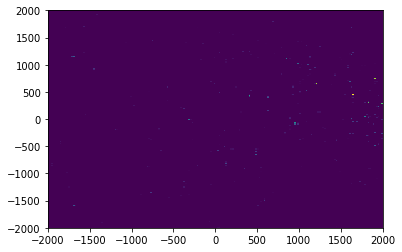

In [52]:
#loop over events
data = []

for ievt in range(0,100): #can the range be determined from the root file?
    for part_type in ['e']:#pi0 previously. See 'Get Hits' section
        ECAL = []
        key = '%s_EcalEndcapP'%(part_type)
        
        
#        mask = [(E[key][ievt]>0.005) & (E[key][ievt]/np.sum(E[key][ievt])>0.001)]
        #mask = [(E[key][ievt]>0.001) & (E[key][ievt]<10000)]
        mask = [(E[key][ievt]<10)]
        #print(E)
   
        ECAL_x = x[key][ievt][mask]
        ECAL_y = y[key][ievt][mask]
        ECAL_E = E[key][ievt][mask]*1000.0 #(MeV)
        
        #print('NUmber of CELLS ', len(ECAL_E))
    
        #print(cell_x)
        #print(cell_E)
        c = plt.hist2d(ECAL_x,ECAL_y, weights=ECAL_E,label=part_type + ' evt #%i'%(ievt), 
                     bins=[200,200],range=([[-2000, 2000], [-2000,2000]]),cmap=plt.cm.viridis)
        #plt.colorbar(c[3], ax=c)            
        suma_ECAL = np.sum(E[key][ievt])
        print('Event Number %i'%(ievt) , ' Suma ECAL =%2.2f GeV'%suma_ECAL)
        #### HCAL 
        
        #ECAL.append(list(cell_E))
        
        key = '%s_HcalEndcapP'%(part_type)

        #print('######################   Entering HCAL   ##########################')
        
        event_array = []
        for length_1 in range(100,500,20): #20 iterations
            for length_2 in range(100,500,20): #20 iterations (20x20=400 images). Changes z-position of HCal boundary for now
                Image = {}
                Image['ECAL_E'] = ECAL_E
                Image['ECAL_x'] = ECAL_x
                Image['ECAL_y'] = ECAL_y
                Image['HCAL1_E'] = []
                Image['HCAL2_E'] = []
                Image['HCAL3_E'] = []
                Image['HCAL1_x'] = []
                Image['HCAL2_x'] = []
                Image['HCAL3_x'] = []
                Image['HCAL1_y'] = []
                Image['HCAL2_y'] = []
                Image['HCAL3_y'] = []
                Image['boundary'] = (length_1, length_2)
                if(length_1+length_2>999): continue
                #fig,ax  = plt.subplots(1,4,figsize=(20,4),sharex=True, sharey=True)
    
                #print('Length 1= ', length_1,' legnth 2' , length_2)
              
                for iz, zbins in enumerate([(3000,3000+length_1),(3000+length_1, 3000+length_1+length_2),(3000+length_1+length_2,4000)]):
                    #print('############')
                    mask = [(z[key][ievt]>zbins[0]) & (z[key][ievt]<zbins[1]) & (E[key][ievt]>0.0)]
                    if(np.sum(mask)<1): continue
                    cell_x = x[key][ievt][mask]
                    cell_y = y[key][ievt][mask]
                    cell_E = E[key][ievt][mask] *1000.0 # MEV
                    #print(cell_E)
                    #c = ax[iz+1].hist2d(cell_x,cell_y, weights=cell_E,label=part_type + ' evt #%i'%(ievt), 
                    #    bins=[40,40],range=([[-2000, 2000], [-2000,2000]]))
                    #fig.colorbar(c[3], ax=ax[iz+1])       
                    Image['HCAL%i_E'%(iz+1)].append(cell_E)
                    Image['HCAL%i_x'%(iz+1)].append(cell_x)
                    Image['HCAL%i_y'%(iz+1)].append(cell_y)

                    #ax[iz+1].set_title('%i, %i'%(zbins[0],zbins[1]))
                    #HCAL['%i_x'%(iz+1)].append(list(cell_x))
                    #HCAL['%i_y'%(iz+1)].append(list(cell_y))

        #HCAL_tot = [HCAL['1'],HCAL['2'],HCAL['3'],(3200,3400)]  
                #print([HCAL,(length_1,length_2)])
                event_array.append(Image)
        
        data.append(event_array)
        ##END OF EVENT
        #ax[0].set_title('ECAL \n %s event'%(part_type))
        #for iz in range(3):
        #    ax[iz+1].set_title('HCAL %i \n %s event, %2.0f GeV'%(iz,part_type,truth[part_type+'_p']))

        #ax[0].legend()
        #for a in ax:
        #    a.set_xticklabels([])
        #    a.set_yticklabels([])
        #plt.subplots_adjust(wspace=0, hspace=0.5)
#TOTAL = []
mc_truth = {}
mc_truth['true_energy']=truth['e_p']
mc_truth['true_angle']=truth['e_theta']

with open("%s.npy"%(output_npy), 'wb') as f:
    np.save(f, mc_truth)
    np.save(f, data)
 
#print(data[ievt])
#print(data[ievt])

#print('Primera entry')
#print(data[0][1])
#print('Second entry')

#print(data[0][2])
#print('Thriy')

#print(data[0][3])

#print ('HCAL 1', HCAL['1'])
#print ('HCAL 2 ', HCAL['2'])
#print ('HCAL 3 ', HCAL['3'])

In [61]:
with open('%s.npy'%(output_npy), 'rb') as f:
    header = np.load(f,allow_pickle=True)
    print(header)
    print(type(header)) #figure this out (google)
    data = np.load(f,allow_pickle=True)
    print(data)
    ievt = 99  #could loop
    print('number of images in event', len(data[ievt]))
    ## Here we loop over all "images", which are created by integrating HCAL sampling layers defing 3 sectors defined 
    ## by two z position that define boundary. Note for all images ECAL is the same (no longitudinal separation in ECAL)
    for im in range(len(data[ievt])):
        print('#  IMAGE NUMBER %i############\n\n\n'%im)
        print(data[ievt][im]) #This is a dictionary
        print(data[ievt][im].keys())
        #print('HCAL1 x [mm] \n', data[ievt][im]['HCAL1_x']) ##This is x of HCAL#1 image im
        #print('HCAL1 y [mm]\n', data[ievt][im]['HCAL1_y']) ##This is y of HCAL#1 image im
        #print('HCAL1 E [GeV]\n', data[ievt][im]['HCAL1_E']) ## this is E of HCAL#1 image im
        #print('HCAL2 x [mm]\n', data[ievt][im]['HCAL2_x']) ##This is x of HCAL#2 image im
        #print('HCAL2 y [mm]\n', data[ievt][im]['HCAL2_y']) ##This is y of HCAL#2 image im
        #print('HCAL2 E [mm]\n', data[ievt][im]['HCAL2_E']) ## this is E of HCAL#2 image im
        #print('HCAL3 x [mm]\n',data[ievt][im]['HCAL3_x']) ##This is x of HCAL#3 image im
        #print('HCAL3 y [mm]\n',data[ievt][im]['HCAL3_y']) ##This is y of HCAL#3 image im
        #print('HCAL3 E [mm]\n',data[ievt][im]['HCAL3_E']) ## this is E of HCAL#3 image im
        #print('ECAL x [mm]\n',data[ievt][im]['ECAL_E']) ## this is E of ECAL image im
        #print('ECAL y [mm]\n',data[ievt][im]['ECAL_x']) ## this is x of ECAL image im
        print('ECAL E [mm]\n',data[ievt][im]['ECAL_y']) ## this is x of ECAL image im
        #print('Boundaries\n',data[ievt][im]['boundary'])  ## This are the boundaries (z positions of long layers) used to created image


{'true_energy': 20.00995, 'true_angle': 93.53711841900682}
<class 'numpy.ndarray'>
[[{'ECAL_E': array([0.37996194, 1.2484465 , 3.0517578 , 0.33774397, 0.30758822,
         0.44027334], dtype=float32), 'ECAL_x': array([  -70.,  2280., -1145.,  -270.,  -845.,   630.], dtype=float32), 'ECAL_y': array([1105.,  855.,  780.,   55.,  880.,  430.], dtype=float32), 'HCAL1_E': [], 'HCAL2_E': [], 'HCAL3_E': [], 'HCAL1_x': [], 'HCAL2_x': [], 'HCAL3_x': [], 'HCAL1_y': [], 'HCAL2_y': [], 'HCAL3_y': [], 'boundary': (100, 100)}
  {'ECAL_E': array([0.37996194, 1.2484465 , 3.0517578 , 0.33774397, 0.30758822,
         0.44027334], dtype=float32), 'ECAL_x': array([  -70.,  2280., -1145.,  -270.,  -845.,   630.], dtype=float32), 'ECAL_y': array([1105.,  855.,  780.,   55.,  880.,  430.], dtype=float32), 'HCAL1_E': [], 'HCAL2_E': [], 'HCAL3_E': [], 'HCAL1_x': [], 'HCAL2_x': [], 'HCAL3_x': [], 'HCAL1_y': [], 'HCAL2_y': [], 'HCAL3_y': [], 'boundary': (100, 120)}
  {'ECAL_E': array([0.37996194, 1.2484465 , 3.0

{'ECAL_E': array([ 0.74786156,  5.1204395 ,  4.245924  ,  7.858578  ,  0.39202422,
        8.184259  ,  2.5511732 ,  1.103699  ,  2.0204327 ,  1.3147889 ,
       34.64288   ,  8.359163  , 19.402184  ,  1.9721833 ,  0.8865779 ,
        0.51264703,  1.6404706 ,  4.0649896 , 22.206665  ,  3.9805536 ,
        5.554682  ,  8.9683075 ,  0.71167475,  2.0023391 ,  3.5161557 ,
        3.057789  ,  2.756232  ,  2.5029237 ,  3.8358061 , 41.482197  ,
       13.31073   ,  2.0505881 ,  3.0336642 , 16.89926   ,  4.1795816 ,
       11.24808   ,  1.4715986 ,  2.0144014 ,  5.6451488 ,  0.5850208 ,
        1.8394983 ,  0.9408581 ,  2.4365814 ,  2.424519  ,  5.7898965 ,
        2.4787993 ,  3.2930033 ,  5.9225817 ,  2.122962  ,  5.048066  ,
        6.797097  , 15.723187  , 18.708601  ,  1.869654  ,  6.157796  ,
        6.9478755 , 10.30119   ,  2.3280208 ,  1.1941662 ,  0.65739447,
        5.1988444 , 10.819868  , 13.087578  , 13.913845  ,  0.7357993 ,
        1.1338547 ,  0.5970831 , 19.058409  ,  2.0385

 [ -370.    30.   430.  -520.   880.   355.   380.   380.   355.   130.
   -70.   -95.   -95.   -70.  -870.  1680.  -195.  -170.  1030.   680.
   655.   955.   830. -1220.  1380.   530.  -845.  -820.   830.   430.
   405.   455.  1105.   405.     5. -1495. -1520. -1470.   455.   455.
  1130.  1430.  -420.  1305.  -220.  -545.  -545.   -95.   -20.  1355.
   305.   105. -1595. -1595.   580.   905.   930.    80.  -645. -1095.
    80.   -45.   -45.  1180. -1970.  1205.  1180.   680.   705.   455.
  -995. -1920.   455.   430.   180. -2145. -2145.  1455.  -170.  -195.
  1105.  1105.  -845. -1345.  -570.  -370. -1195.  -970.  1380.   630.
   755.   730.   705.   130.  1055.  1080. -1145.  -970.   -70.  -145.
  -170.   155.   605.  1005.  1155.  1155. -1245. -1195. -1595.   480.
  -395.  -370.   280.   230.   230.  1930.  -120.   330.  1680.  1230.
  1230.  -595.  1180.  1255.  -270.  -420.   505.   580.   530. -1145.
 -2170.   805.  -945. -1245. -1420.  -870.  -870.    55.    30.  -470.
  -44

        -445.,  -570.,  1455.,  -370.,  1080.,  1255.], dtype=float32), 'HCAL1_E': [], 'HCAL2_E': [], 'HCAL3_E': [], 'HCAL1_x': [], 'HCAL2_x': [], 'HCAL3_x': [], 'HCAL1_y': [], 'HCAL2_y': [], 'HCAL3_y': [], 'boundary': (260, 440)}
dict_keys(['ECAL_E', 'ECAL_x', 'ECAL_y', 'HCAL1_E', 'HCAL2_E', 'HCAL3_E', 'HCAL1_x', 'HCAL2_x', 'HCAL3_x', 'HCAL1_y', 'HCAL2_y', 'HCAL3_y', 'boundary'])
ECAL E [mm]
 [ -370.    30.   430.  -520.   880.   355.   380.   380.   355.   130.
   -70.   -95.   -95.   -70.  -870.  1680.  -195.  -170.  1030.   680.
   655.   955.   830. -1220.  1380.   530.  -845.  -820.   830.   430.
   405.   455.  1105.   405.     5. -1495. -1520. -1470.   455.   455.
  1130.  1430.  -420.  1305.  -220.  -545.  -545.   -95.   -20.  1355.
   305.   105. -1595. -1595.   580.   905.   930.    80.  -645. -1095.
    80.   -45.   -45.  1180. -1970.  1205.  1180.   680.   705.   455.
  -995. -1920.   455.   430.   180. -2145. -2145.  1455.  -170.  -195.
  1105.  1105.  -845. -1345.  -570.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#sf_ECAL = 0.253
#sf_HCAL = 0.025
    #print('Energy = %2.3f'%(suma_ECAL/sf_ECAL+suma_HCAL/sf_HCAL))
    ##suma_HCAL = np.sum(E[key][ievt])
    #print(suma_HCAL/sf_HCAL)